In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:

# Data (CPU/Memory fields removed per request)
data = {
    'Number UEs str': [256, 512, 1024, 2048, 4096, 8192],
    'Total Handover Time (s)': [42, 132, 279, 404, 837, 1004],  # Already in s from your table
    'Std Dev (Total Handover Time)': [4.2, 13.2, 27.9, 40.4, 83.7, 100.4],  # 10% of the values
    'Handover Count': [180, 241, 269, 297, 325, 353],
    'Handover Time by UE(s)': [42/256, 132/512, 279/1024, 404/2048, 837/4096, 1004/8192],  # Total time / Number of UEs
    'Std Dev (Handover Time by UE)': [0.016, 0.025, 0.027, 0.032, 0.020, 0.012]  # Proportional std dev
}


df = pd.DataFrame(data)

df = pd.DataFrame(data)
df['Number UEs number'] = df['Number UEs str'].astype(int)

# Set seaborn style
sns.set(style="whitegrid")

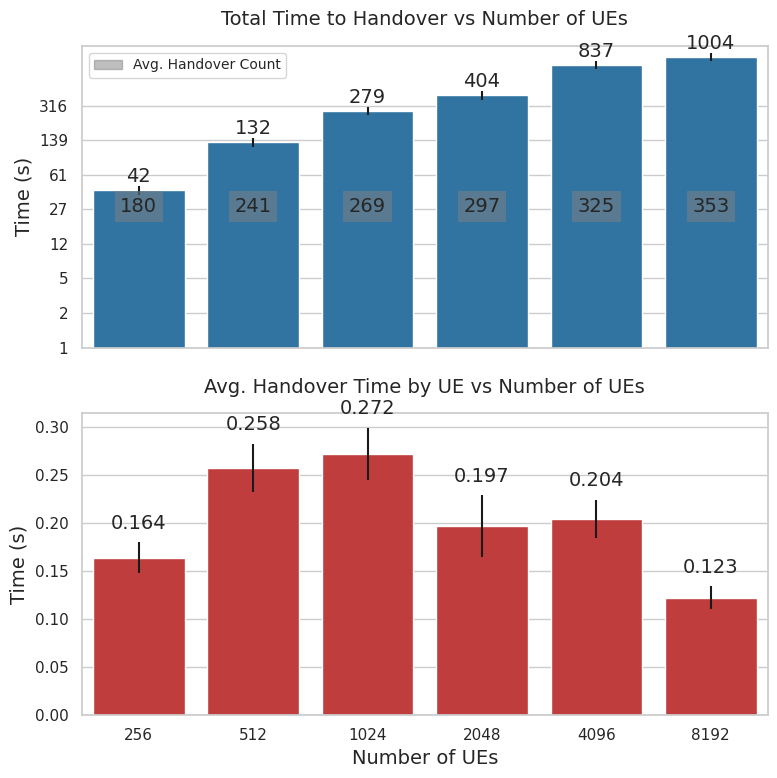

In [7]:
# Create subplots (now only 2 rows)
fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=False)
fontsize = 14
plt.rcParams.update({'font.size': fontsize})

# --- Subplot 1: Total Handover Time vs Number of UEs ---
sns.barplot(x='Number UEs number', y='Total Handover Time (s)', yerr=df['Std Dev (Total Handover Time)'], data=df, ax=axs[0], color='tab:blue')
axs[0].set_title('Total Time to Handover vs Number of UEs', pad=15, fontsize=fontsize)
axs[0].set_ylabel('Time (s)', fontsize=fontsize)
axs[0].set_yscale('log')
yticks = np.logspace(0, 2.5, num=8)
axs[0].set_yticks(yticks)
axs[0].set_yticklabels([f'{y:.0f}' for y in yticks])
axs[0].set_xticks([])
axs[0].set_xlabel('')

# Annotate total handover time values
for i, v in enumerate(df['Total Handover Time (s)']):
    axs[0].annotate(str(round(v, 0)), (i, v + df['Std Dev (Total Handover Time)'][i] + 0.01), ha='center', va='bottom')

# Annotate handover count near baseline
for i, v in enumerate(df['Handover Count']):
    axs[0].annotate(str(round(v, 0)), (i, min(df['Total Handover Time (s)'])-6), ha='center', va='top',
                    bbox=dict(facecolor='gray', alpha=0.5, edgecolor='none'))
annotation_patch = mpatches.Patch(color='gray', label='Avg. Handover Count', alpha=0.5)
axs[0].legend(handles=[annotation_patch], prop={'size': 10})

# --- Subplot 2: Avg. Handover Time per UE vs Number of UEs ---
sns.barplot(x='Number UEs number', y='Handover Time by UE(s)', yerr=df['Std Dev (Handover Time by UE)'], data=df, ax=axs[1], color='tab:red')
axs[1].set_title('Avg. Handover Time by UE vs Number of UEs', pad=15, fontsize=fontsize)
axs[1].set_xlabel('Number of UEs', fontsize=fontsize)
axs[1].set_ylabel('Time (s)', fontsize=fontsize)

# Annotate per-UE times
for i, v in enumerate(df['Handover Time by UE(s)']):
    axs[1].annotate(str(round(v, 3)), (i, v + df['Std Dev (Handover Time by UE)'][i] + 0.01), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.savefig('out/xApp-handover.pdf', bbox_inches='tight')
plt.savefig('out/xApp-handover.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# Analysis of Handover Behavior

## Key Observations:
# 1. Initial state: 56 active PCIs with UEs distributed across all cells
# 2. Non-linear scaling of handover times with peak at 2048 UEs
# 3. Performance recovery at higher UE counts (4096-8192)

# UE Distribution per PCI:
ue_per_pci = df['Number UEs number'] / 56
for i, (ues, ratio) in enumerate(zip(df['Number UEs number'], ue_per_pci)):
    print(f"{ues} UEs: {ratio:.1f} UEs/PCI - Handover Time: {df['Total Handover Time (s)'].iloc[i]}s")

# The peak at 2048 UEs (36.6 UEs/PCI) likely represents the critical density 
# where resource contention and signaling overhead are maximized before 
# optimization mechanisms kick in at


256 UEs: 4.6 UEs/PCI - Handover Time: 42s
512 UEs: 9.1 UEs/PCI - Handover Time: 132s
1024 UEs: 18.3 UEs/PCI - Handover Time: 279s
2048 UEs: 36.6 UEs/PCI - Handover Time: 404s
4096 UEs: 73.1 UEs/PCI - Handover Time: 837s
8192 UEs: 146.3 UEs/PCI - Handover Time: 1004s
